### Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sdata = pd.read_csv("vaccination_tweets.csv")
print(sdata.head())

                    id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405  

### Data Preprocessing

In [2]:
sdata.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [3]:
sdata.dropna()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1461054395882344452,Dr Giacomo Benedetto,United Kingdom,Jean Monnet Chair in European Politics.\nLates...,2012-11-09 17:46:58,1747,1065,6501,False,2021-11-17 19:31:27,#PfizerBioNTech has given me a worse headache ...,['PfizerBioNTech'],Twitter for Android,0,0,False
11012,1460982017173114880,Lincoln University - College of Agricuture (CA...,"Jefferson City, MO","Lincoln University - College of Agriculture, E...",2019-03-25 16:35:26,185,364,114,False,2021-11-17 14:43:51,Yes. Children ages 5–11 years receive one-thir...,"['PfizerBioNTech', 'COVID19']",Hootsuite Inc.,0,1,False
11013,1460977748449574912,Dr Giacomo Benedetto,United Kingdom,Jean Monnet Chair in European Politics.\nLates...,2012-11-09 17:46:58,1747,1065,6501,False,2021-11-17 14:26:53,And back to #Harlequins #COYQ for the booster...,"['Harlequins', 'COYQ', 'PfizerBioNTech', 'Astr...",Twitter for Android,1,0,False
11014,1460966011243532290,Gerard Abeysena,"Dubai, United Arab Emirates",Husband of Umanga for 34 years & father of Ris...,2010-07-12 03:59:43,395,395,23050,False,2021-11-17 13:40:15,@ruvanw @GMalavige @chandi2012 I already had m...,"['PfizerBioNTech', 'Dubai', 'UAE']",Twitter for Android,0,1,False


In [4]:
sdata.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.102000e+04,1.102000e+04,11020.000000,1.102000e+04,11020.000000,11020.000000
mean,1.372977e+18,3.518827e+04,1170.470236,1.533289e+04,1.360436,7.510617
std,3.311622e+16,2.942509e+05,2798.429673,4.944401e+04,11.364732,51.192608
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.347623e+18,1.110000e+02,164.000000,4.360000e+02,0.000000,0.000000
50%,1.360274e+18,4.790000e+02,460.000000,2.323500e+03,0.000000,1.000000
75%,1.395234e+18,2.171250e+03,1221.000000,1.114075e+04,1.000000,4.000000
max,1.463244e+18,1.371493e+07,103226.000000,1.213794e+06,678.000000,2315.000000


### Text Mining

In [5]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
sdata["text"] = sdata["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91852\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### WordCloud Visualisation

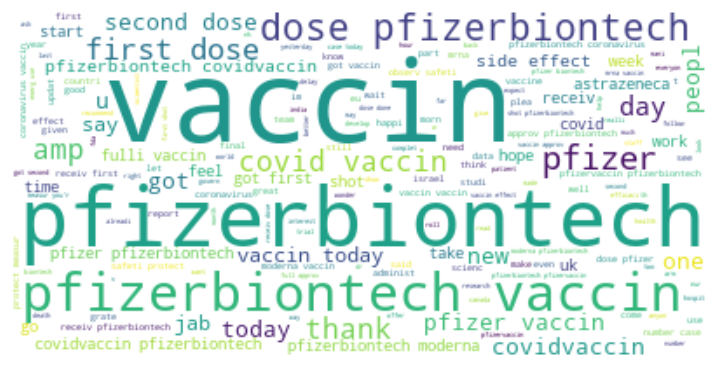

In [6]:
text = " ".join(i for i in sdata.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(9,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Hashtags

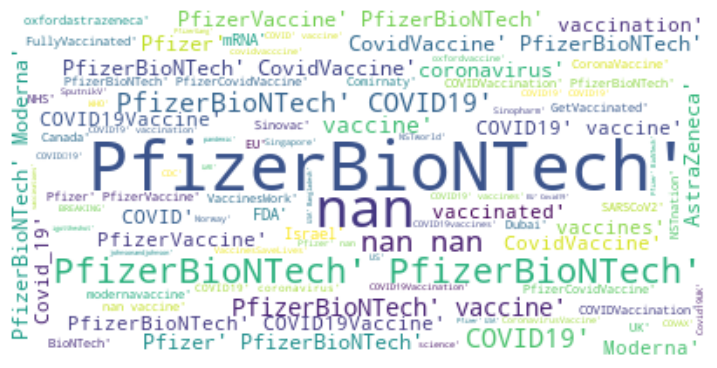

In [7]:
text = " ".join(str(i) for i in sdata.hashtags)  # Convert float values to strings
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(9, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Validated users

In [8]:
sdata["user_verified"].value_counts()

user_verified
False    10084
True       936
Name: count, dtype: int64

### Polarization

In [9]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
sdata["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in sdata["text"]]
sdata["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in sdata["text"]]
sdata["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in sdata["text"]]
sdata = sdata[["text", "Positive", "Negative", "Neutral"]]
sdata.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91852\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,Positive,Negative,Neutral
0,folk said daikon past could treat cytokin stor...,0.252,0.000,0.748
1,world wrong side histori year hope biggest vac...,0.193,0.207,0.600
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,0.000,1.000
3,fact immut senat even your ethic sturdi enough...,0.000,0.000,1.000
4,explain need vaccin borisjohnson matthancock w...,0.000,0.000,1.000


### TOPIC MODELLING 

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

data = pd.read_csv('vaccination_tweets.csv')

# Preprocess the text data
text_data = data['text'].fillna('').values.tolist()
# Create a document-term matrix
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
dtm = vectorizer.fit_transform(text_data)

# Apply LDA
num_topics = 6  # Specify the number of topics to extract
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(dtm)

# Get the top words for each topic
feature_names = vectorizer.get_feature_names()
top_words_per_topic = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    top_words_per_topic.append(top_words)

# Print the top words for each topic
for topic_idx, top_words in enumerate(top_words_per_topic):
    print(f'Topic #{topic_idx+1}:')
    print(', '.join(top_words))
    print()

Topic #1:
https, pfizerbiontech, vaccine, dose, covid19, pfizer, second, arm, amp, covidvaccine

Topic #2:
https, pfizerbiontech, vaccine, dose, today, covid19, got, doses, covidvaccine, vaccinated

Topic #3:
https, pfizerbiontech, vaccine, dose, vaccinated, second, vaccination, pfizervaccine, feeling, covid19

Topic #4:
https, pfizerbiontech, vaccine, pfizer, covid, 19, dose, covid19, biontech, vaccinated

Topic #5:
https, pfizer, covid19, pfizerbiontech, amp, vaccines, vaccination, covidvaccine, doses, eu

Topic #6:
https, pfizerbiontech, vaccine, vaccines, covid19, just, moderna, thank, astrazeneca, amp



F:\New folder\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
x = sum(sdata["Positive"])
y = sum(sdata["Negative"])
z = sum(sdata["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
sentiment_score(x, y, z)

Neutral


### Impact on pfizer

In [18]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1015.070999999998
Negative:  443.2460000000005
Neutral:  9561.695999999913
